##Option pricing in Hull-White Model - Project

The calibration in Black-Scholes Model based on historic data of Twitter stocks and prediction of the future process using Euler-Maruyama method.

Authors: Martyna Mech, Natalia Komisarska



## Loading and describing data

We start from importing necessary libraries and Twitter's stock data.

In [1]:
pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats
import statistics
import datetime

In [3]:
twtr = yf.download("x", start='2015-11-07', end=None)

[*********************100%***********************]  1 of 1 completed


In [4]:
print(twtr.info)

<bound method DataFrame.info of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-11-09  10.840000  10.980000  10.450000  10.510000   9.763875   7152300
2015-11-10  10.420000  10.890000  10.300000  10.810000  10.090586   7101300
2015-11-11  10.940000  10.970000  10.010000  10.120000   9.446502   9352500
2015-11-12   9.940000  10.020000   9.610000   9.680000   9.035783  10373400
2015-11-13   9.780000   9.940000   9.420000   9.750000   9.101128   8461200
...               ...        ...        ...        ...        ...       ...
2024-10-07  35.369999  35.680000  35.250000  35.389999  35.389999   1201600
2024-10-08  35.250000  35.599998  35.130001  35.259998  35.259998   2070900
2024-10-09  35.250000  35.669998  35.250000  35.650002  35.650002    980600
2024-10-10  35.250000  35.619999  35.250000  35.410000  35.410000   1132300
2024-10-11  35.689999  36.709999  35.650002  36.610001  

In [5]:
twtr.head(100)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-09,10.84,10.980000,10.45,10.510000,9.763875,7152300
2015-11-10,10.42,10.890000,10.30,10.810000,10.090586,7101300
2015-11-11,10.94,10.970000,10.01,10.120000,9.446502,9352500
2015-11-12,9.94,10.020000,9.61,9.680000,9.035783,10373400
2015-11-13,9.78,9.940000,9.42,9.750000,9.101128,8461200
...,...,...,...,...,...,...
2016-03-29,15.20,16.170000,14.94,16.120001,15.144654,17537000
2016-03-30,16.18,16.760000,15.85,16.459999,15.464087,19427700
2016-03-31,16.42,17.040001,15.88,16.049999,15.078889,14816900


In [6]:
twtr.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-07,35.369999,35.680000,35.250000,35.389999,35.389999,1201600
2024-10-08,35.250000,35.599998,35.130001,35.259998,35.259998,2070900
2024-10-09,35.250000,35.669998,35.250000,35.650002,35.650002,980600
2024-10-10,35.250000,35.619999,35.250000,35.410000,35.410000,1132300
2024-10-11,35.689999,36.709999,35.650002,36.610001,36.610001,2197500


In [7]:
twtr.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


We see that there is no missing data.

Our data includes info about Twitter stock prices since 7th November 2013 until today.  

In [8]:
twtr.count()

,0
Open,2246
High,2246
Low,2246
Close,2246
Adj Close,2246
Volume,2246


In [9]:
twtr_adj_close = twtr['Adj Close']

In [10]:

dates = twtr.index

Below we see a graphic representation of stock prices over the years.

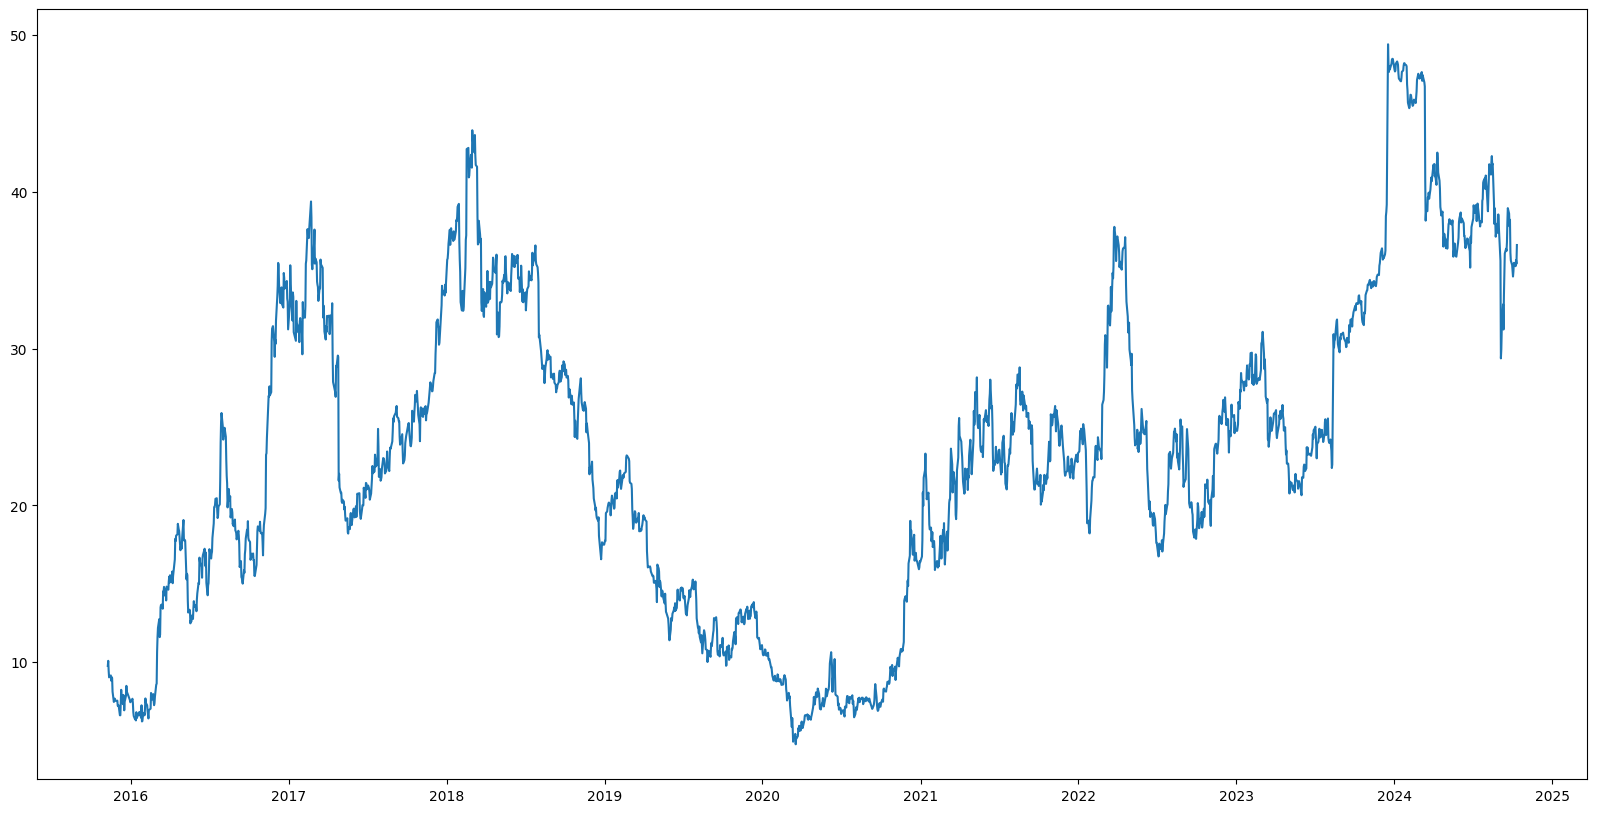

In [11]:
plt.figure(figsize=(20, 10))
t_=np.linspace(0, len(twtr_adj_close), len(twtr_adj_close))
plt.plot(dates, twtr_adj_close)

## Calibration

We need to start with estimating the parameters in the Black-Scholes model
$dS(t) = \mu S(t)dt + \sigma S(t)dW_t$.

Based on the article "Using correlated stochastic differential equations to forecast cryptocurrency
rates and social media activities", Stephen Dipple, Abhishek Choudhary,
James Flamino, Boleslaw K. Szymanski and G. Korniss
 the parameters estimators have been calculated as:
<br>
$$\hat{\bar\mu}=\frac{1}{N \Delta t}ln \frac{S(t_N)}{S(t_0)}$$

$$\hat\sigma^2=\frac{1}{N\Delta t}\sum_{i=1}^{N}\left[ln\left(\frac{S(t_i)}{S(t_{i-1})}\right)-\hat{\bar\mu} \Delta t\right]^2$$

<br>

$S(t_i)$ - Adjusted close price adjusted for splits and dividend and/or capital gain distributions.


<br>

In our case of course $\Delta t$ is $1$ (one day).

<br>

We will use historical data that we imported to calculated these values for our specific project.

In [12]:
twtr_adj_close = twtr['Adj Close']

In [13]:
twtr_adj_close

,Adj Close
Date,
2015-11-09,9.763875
2015-11-10,10.090586
2015-11-11,9.446502
2015-11-12,9.035783
2015-11-13,9.101128
...,...
2024-10-07,35.389999
2024-10-08,35.259998
2024-10-09,35.650002


In [14]:
N = twtr_adj_close.count()

def calib(prices_table):
  mu = np.log(prices_table[N-1]/prices_table[0])/N
  sig = 0

  for i in range(N-1):
    ls = (np.log(prices_table[i+1]/prices_table[i]) - mu)**2
    sig = sig+ls

  sig = np.sqrt(sig/N)

  return mu, sig

In [15]:
calib(twtr_adj_close)

<ipython-input-14-927dabf63a5d>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = np.log(prices_table[N-1]/prices_table[0])/N
<ipython-input-14-927dabf63a5d>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ls = (np.log(prices_table[i+1]/prices_table[i]) - mu)**2


(0.000588438153474613, 0.0384175733957193)

We obtain vector of parameters $ (\mu, \sigma)$ with the above values.

## Predictions

After obtaining above values, we now need to put these parameters into the Black Scholes equation and carry on with the prediction of the future process.

 Euler-Maruyama scheme
$$Y_{0}= S_{0}$$
$$Y_{n} = Y_{n−1} + a(t_{n−1}, Y_{n−1})h + b(t_{n−1}, Y_{n−1})\sqrt h Z_n$$
<br>
where $Z_{1},\dots,Z_{n}$ are independent random variables from $N(0, 1)$.


$(Y_{n})_{n=0}^{N}$ is the Euler-Maruyama approximation of the solution
of the Black-Scholes model
$dS(t) = \mu S(t)dt + \sigma S(t)dW_t$.

We implement the Euler-Maruyama method.

In [16]:
def Euler(start, end, k, first):

  mu = calib(twtr_adj_close)[0]
  sigma = calib(twtr_adj_close)[1]

  dt=1/k
  t_k = np.arange(start, start+1, dt)

  S=np.zeros(k+1)
  S[0] = first
  for i in range(1, k+1):
    rand = np.sqrt(dt) * np.random.normal(0, 1)
    S[i] = S[i-1] + mu * S[i-1] * dt + sigma * S[i-1] * rand

  return  S

We define the function that simulates trajectories obtained by Euler-Maruyama method.

In [17]:
def simul(nsim, t_, k, n):

  plt.figure(figsize=(20, 10))
  firsts = []
  firsts.append(twtr_adj_close[-1])
  l=[]
  tall=[]
  tp=[]
  bt=[]
  lf=[]
  rg=[]


  for s in range(n):

    pom=[]
    t_k = np.linspace(t_[s], t_[s]+1, k+1)
    for i in range(nsim):
      val = Euler(t_[s], t_[s]+1, k, firsts[s])
      l.append(val)
      pom.append(val)
      tall.append(t_k)

    la=[]
    for a in range(len(pom)):
      la.append(pom[a][-1])

    avg = statistics.mean(la)
    stdev = statistics.stdev(la)
    confidence_interval = 1.95 * stdev / np.sqrt(len(la))

    left = t_[s] - 0.25 / 2
    lf.append(left)
    top = avg + confidence_interval
    tp.append(top)
    right = t_[s] + 0.25 / 2
    rg.append(right)
    bottom = avg - confidence_interval
    bt.append(bottom)

    firsts.append(avg)


    for i in range(nsim):
      plt.plot(tall[i+s*10], l[i+s*10], color='grey')

  sctr_x=t_
  sctr_y= firsts
  lgh=len(t_)
  t_1=t_[1: -1]
  rg_1=rg[1: ]
  lf_1=lf[1: ]
  tp_1=tp[:-1]
  bt_1=bt[:-1]
  plt.plot(sctr_x, sctr_y, '-o', color ='red')
  plt.plot([t_1, t_1], [tp_1, bt_1], color='blue')
  plt.plot([lf_1, rg_1], [tp_1, tp_1], color='blue')
  plt.plot([lf_1, rg_1], [bt_1, bt_1], color='blue')
  positions = t_
  labels = dates[ -len(t_): ]
  labels = labels+datetime.timedelta(days=30)
  plt.xticks(positions, labels, rotation=90)

We simulate prices trajectory for the following 20 days. We use Euler-Maruyama method for a single day and calcule the mean of predicted prices, as well as the confidence interval. Then use this mean as the starting point for the next day. The process repeats for all 20 days. The red trajectory is our final output.

<ipython-input-17-66b821443a0c>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  firsts.append(twtr_adj_close[-1])
<ipython-input-14-927dabf63a5d>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = np.log(prices_table[N-1]/prices_table[0])/N
<ipython-input-14-927dabf63a5d>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ls = (np.log(prices_table[i+1]/prices_table[i]) - mu)**2


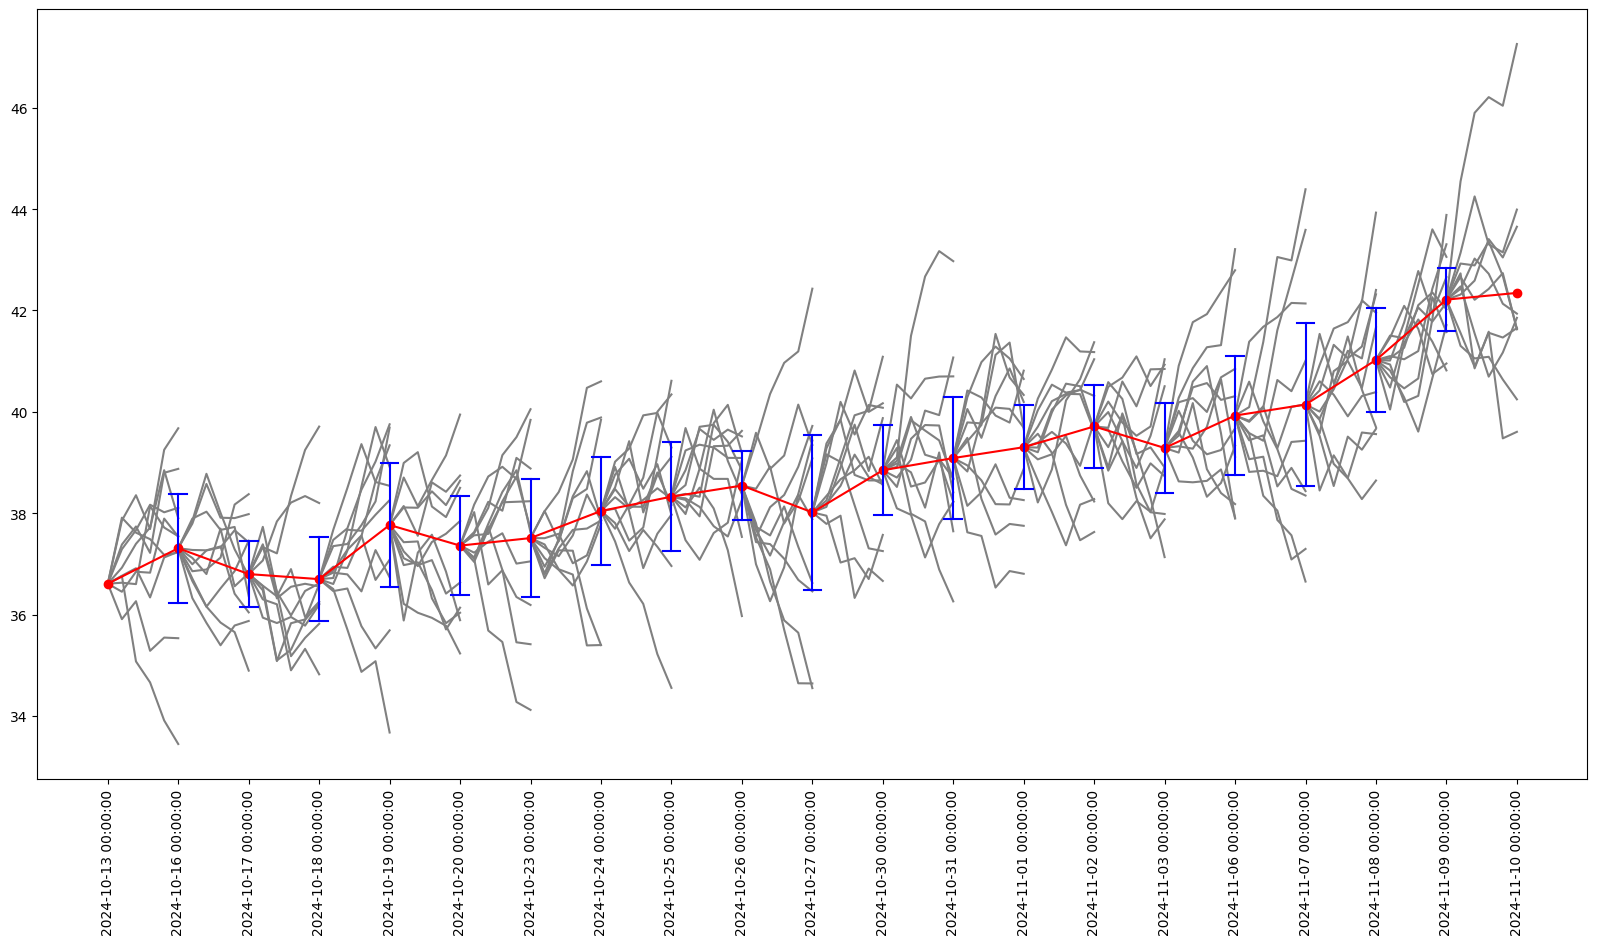

In [18]:
#Simulation for 20 days
n =20
t_=np.arange(len(twtr_adj_close)-1, len(twtr_adj_close)+n, 1)
res = simul(10, t_, 5, n)

Now we make a straightforward prediction for a stock price in 20 days.

<ipython-input-19-bcd6063f3bc1>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = Euler(start,  start+n, n, twtr_adj_close[-1])
<ipython-input-14-927dabf63a5d>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = np.log(prices_table[N-1]/prices_table[0])/N
<ipython-input-14-927dabf63a5d>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ls = (np.log(prices_table[i+1]/prices_table[i]) - mu)**2
<ipython-input-19-bcd6063f3bc1>:25

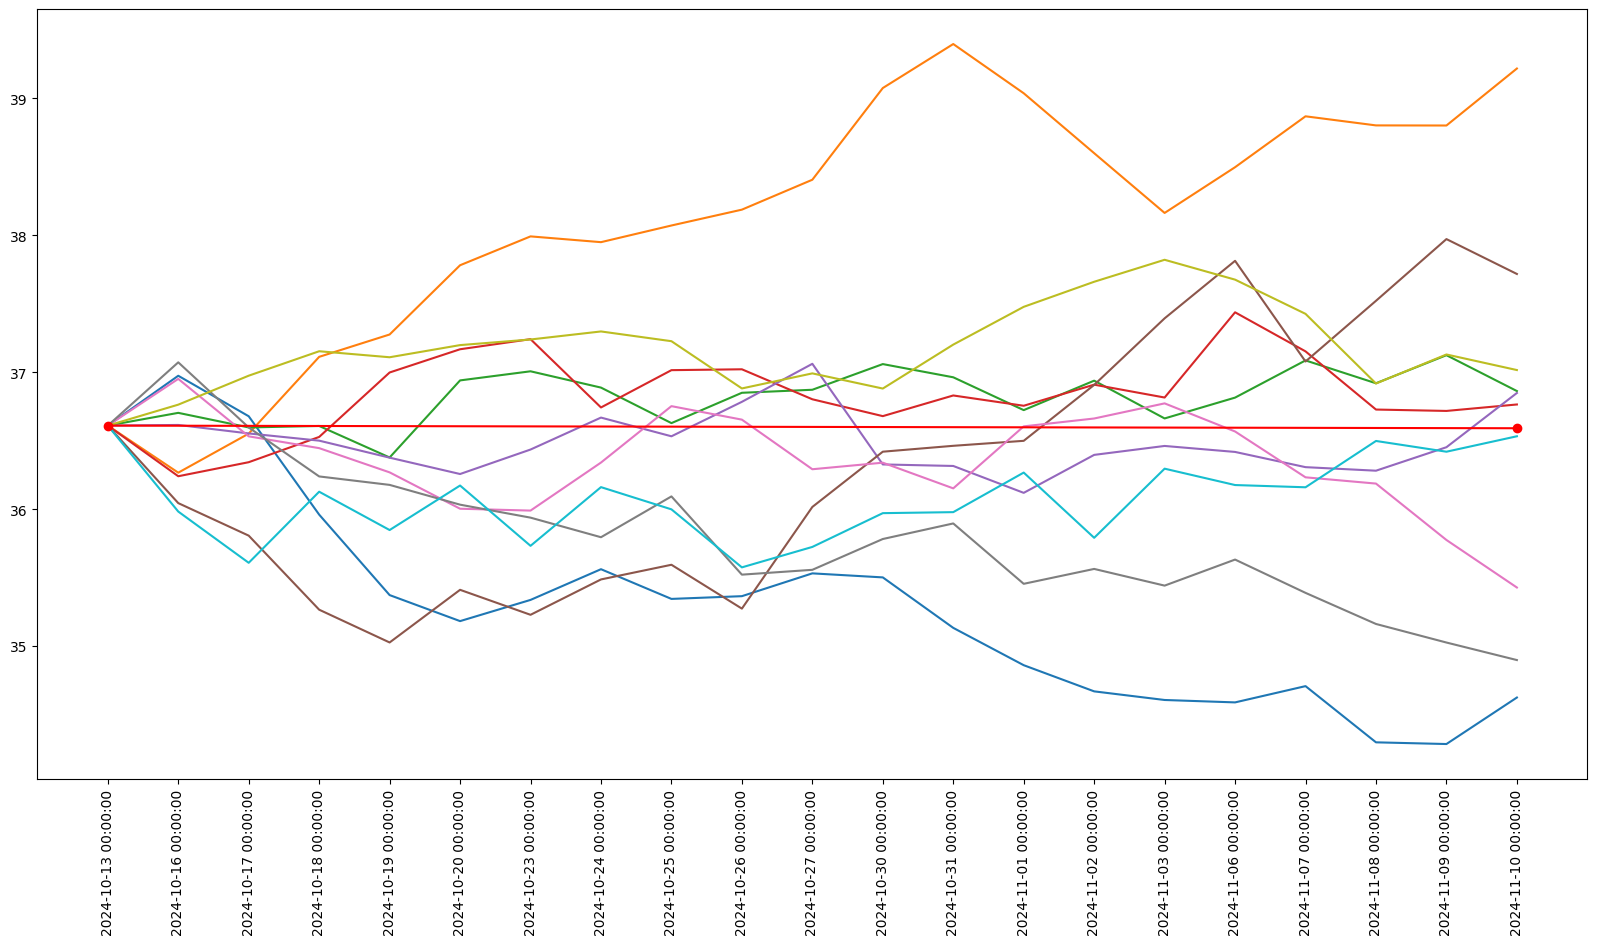

In [19]:
#Simulation for 20 days
nsim= 10
start=t_[0]

n=20
l=np.zeros((10, n+1))
t_=np.linspace(len(twtr_adj_close)-1, len(twtr_adj_close), n+1)
t_k=[]
for i in range(nsim):
  val = Euler(start,  start+n, n, twtr_adj_close[-1])
  l[i]=val
  t_k.append(t_)

plt.figure(figsize=(20,10))
for i in range(nsim):
  plt.plot(t_k[i], l[i])

la=[]
for a in range(len(l)):
  la.append(l[a][-1])

avg=sum(la)/len(la)

sctr_x=[len(twtr_adj_close)-1, len(twtr_adj_close)]
sctr_y= [twtr_adj_close[-1], avg]
plt.plot(sctr_x, sctr_y, '-o', color ='red')
positions = t_
labels = dates[ -len(t_): ]
labels = labels+datetime.timedelta(days=30)
plt.xticks(positions, labels, rotation=90)
plt.show()

Lastly, let's see how well the model could predict today's price if the program run ten days ago.

<ipython-input-20-d56497601f27>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = Euler(start,  start+1, n, twtr_adj_close[-11])
<ipython-input-14-927dabf63a5d>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = np.log(prices_table[N-1]/prices_table[0])/N
<ipython-input-20-d56497601f27>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sctr_y1= twtr_adj_close[-1]


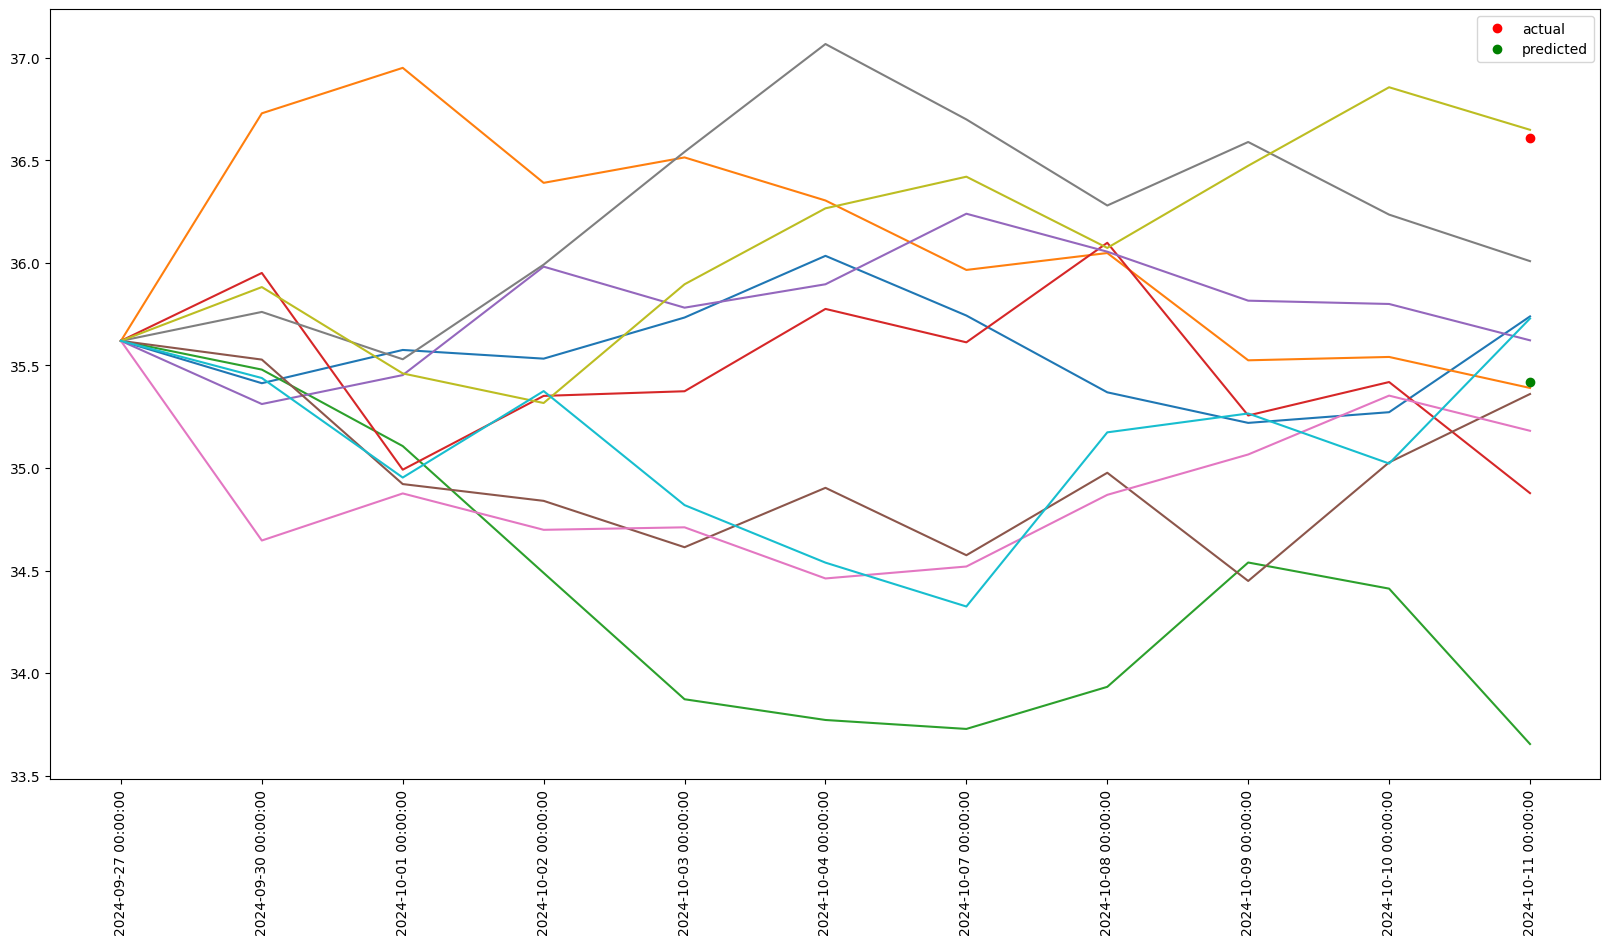

In [20]:
nsim= 10
start=t_[0]
n=10
l=np.zeros((10, n+1))
t_=np.arange(len(twtr_adj_close)-n-2, len(twtr_adj_close)-1, 1)
t_k=[]
for i in range(nsim):
  val = Euler(start,  start+1, n, twtr_adj_close[-11])
  l[i]=val
  t_k.append(t_)

plt.figure(figsize=(20,10))
for i in range(nsim):
  plt.plot(t_k[i], l[i])

la=[]
for a in range(len(l)):
  la.append(l[a][-1])

avg=sum(la)/len(la)

sctr_x=[len(twtr_adj_close)-1, len(twtr_adj_close)-1+n]
sctr_y1= twtr_adj_close[-1]
sctr_y2= avg
plt.plot(t_[-1], sctr_y1, 'o', color ='red', label="actual")
plt.plot(t_[-1], sctr_y2, 'o', color ='green', label="predicted")
plt.legend()
positions = t_
labels = dates[ -len(t_): ]
labels = labels
plt.xticks(positions, labels, rotation=90)
plt.show()